In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from chainer.iterators import MultiprocessIterator, SerialIterator
import numpy as np

In [2]:
def convert_to_keras_batch(iter):
    while True:
        batch = iter.__next__() # type: List[Tuple[np.ndarray, np.ndarray]]
        xs = [x for (x, _) in batch] # type: List[np.ndarray]
        ys = [y for (_, y) in batch] # type: List[np.ndarray]
        _xs = np.array(xs) # (n, 480, 360, 3)
        _ys = np.array(ys) # (n, 480, 360, n_classes)
        yield (_xs, _ys)

In [3]:
from camvid import get_iter as get_camvid
train, valid = get_camvid((512, 512))

In [4]:
train_iter = convert_to_keras_batch(
        SerialIterator(
        #MultiprocessIterator(
            train,
            batch_size=1,
            #n_processes=12,
            #n_prefetch=80,
            #shared_mem=1000*1000*5
        )
)

In [5]:
a, b= train_iter.__next__()

float32 (512, 512, 2) uint8


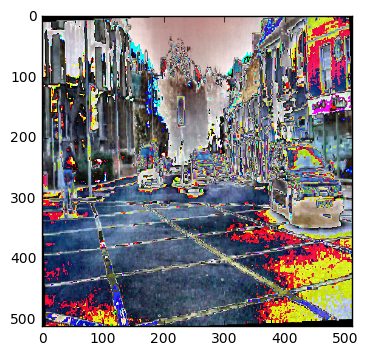

In [6]:
plt.imshow(a[0])

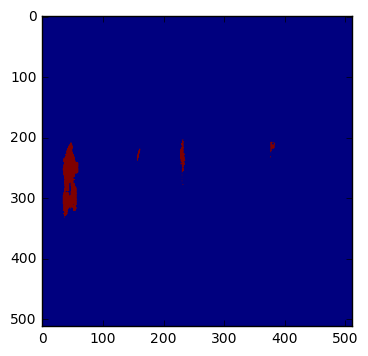

In [7]:
plt.imshow(b[0][:,:,0])

In [ ]:
plt.imshow(b[0][:,:,1])

In [ ]:
import cv2
import skimage.io as io
img = cv2.cvtColor(cv2.imread("/home/ubuntu/github/keras-segnet/data/train/0016E5_08640.png"), cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)

In [ ]:
i